# **Setup**

In [55]:
#Importando las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**Get the Data**
---



In [56]:
#Impoprtando el dataset
dataset = pd.read_csv('DataSet.csv')

# **Take a Quick Look at the Data Structure**

In [57]:
dataset.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [60]:
dataset["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [61]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


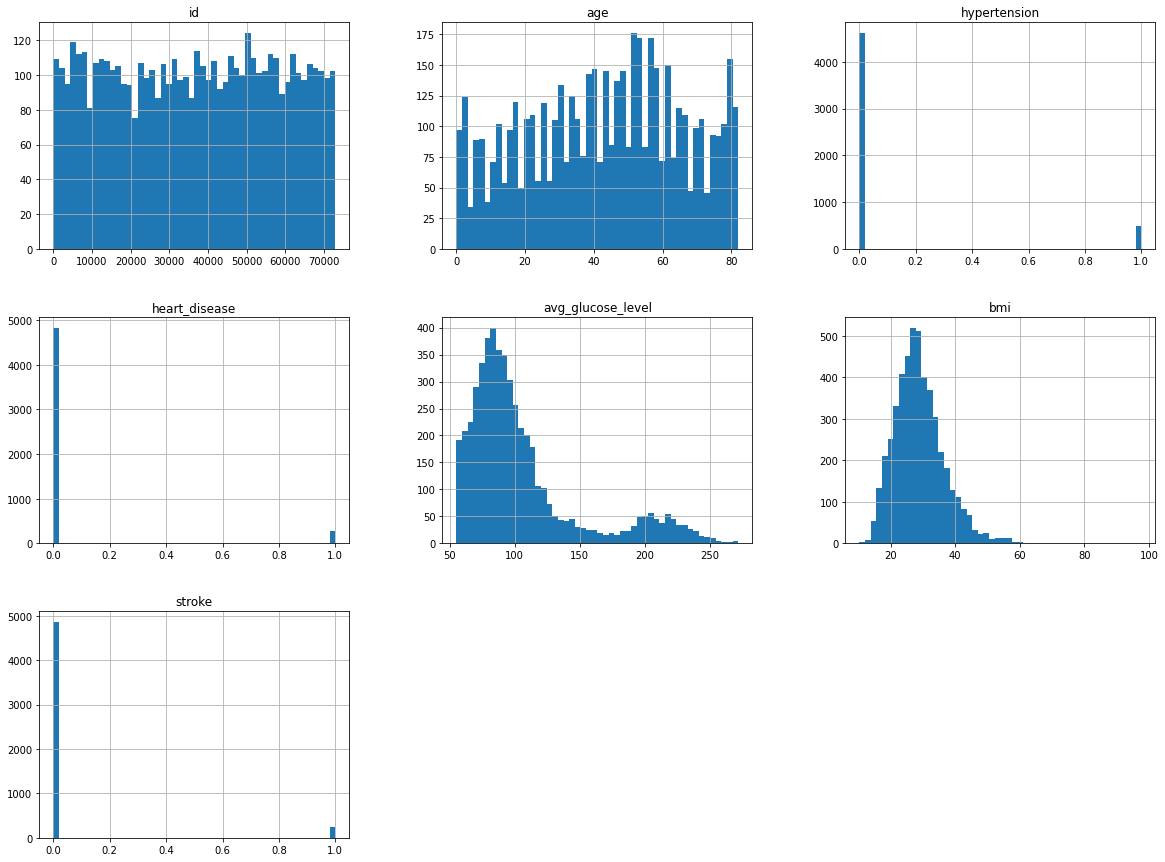

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

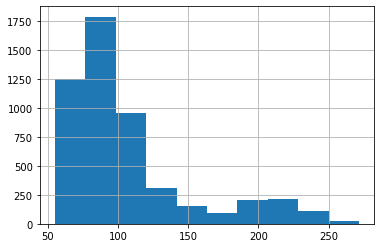

In [63]:
dataset["avg_glucose_level"].hist()

In [64]:
#PREGUNTAR A ALAN POR QUE HACE ESTO
dataset["avg_glucose_level_cat"] = pd.cut(dataset["avg_glucose_level"],
                               bins=[50, 100, 150, 200, 250, 300, np.inf],
                               labels=[50, 100, 150, 200, 250, 300])
dataset["avg_glucose_level_cat"].value_counts()

50     3131
100    1249
200     409
150     296
250      25
300       0
Name: avg_glucose_level_cat, dtype: int64

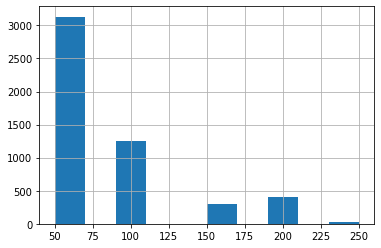

In [65]:
dataset["avg_glucose_level_cat"].hist()


#**Create a Test Set**

In [66]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,200
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,200
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,100
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,150
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,150


In [67]:
#Variables independientes
X = dataset.drop("stroke", axis=1)
#Variables dependientes
y =  dataset["stroke"]

In [68]:
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,avg_glucose_level_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,200
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,200
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,100
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,150
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,150


In [69]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [78]:
#Splitting the data set into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [79]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,avg_glucose_level_cat
4152,12857,Male,55.0,0,0,Yes,Self-employed,Rural,73.57,28.0,smokes,50
4051,52530,Male,55.0,0,0,Yes,Govt_job,Urban,231.15,22.3,never smoked,200
5076,39935,Female,34.0,0,0,Yes,Private,Rural,174.37,23.0,never smoked,150
874,70852,Male,80.0,0,0,Yes,Private,Rural,56.99,26.7,never smoked,50
3534,53897,Female,61.0,0,0,Yes,Private,Urban,108.18,19.1,never smoked,100


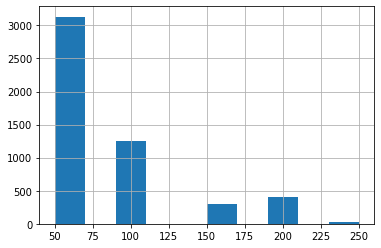

In [80]:
dataset["avg_glucose_level_cat"].hist()

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["avg_glucose_level_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [83]:
strat_test_set["avg_glucose_level_cat"].value_counts() / len(strat_test_set)


50     0.612524
100    0.244618
200    0.080235
150    0.057730
250    0.004892
300    0.000000
Name: avg_glucose_level_cat, dtype: float64

In [84]:
dataset["avg_glucose_level_cat"].value_counts() / len(dataset)


50     0.612720
100    0.244423
200    0.080039
150    0.057926
250    0.004892
300    0.000000
Name: avg_glucose_level_cat, dtype: float64

In [87]:
def avg_glucose_level_cat_proportions(data):
    return data["avg_glucose_level_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": avg_glucose_level_cat_proportions(dataset),
    "Stratified": avg_glucose_level_cat_proportions(strat_test_set),
    "Random": avg_glucose_level_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100


In [88]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
50,0.612720,0.612524,0.628180,2.523156,-0.031939
100,0.244423,0.244618,0.239726,-1.921537,0.080064
150,0.057926,0.057730,0.051859,-10.472973,-0.337838
200,0.080039,0.080235,0.074364,-7.090465,0.244499
250,0.004892,0.004892,0.005871,20.000000,0.000000
300,0.000000,0.000000,0.000000,NaN,NaN


In [90]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("avg_glucose_level_cat", axis=1, inplace=True)

#Discover and Visualize the Data to Gain Insights

In [92]:
dataset = strat_train_set.copy()

#Looking for Correlations


In [94]:
corr_matrix = dataset.corr()

In [97]:
corr_matrix["avg_glucose_level"].sort_values(ascending=False)


avg_glucose_level    1.000000
age                  0.243477
hypertension         0.177421
heart_disease        0.175006
bmi                  0.168160
stroke               0.124858
id                   0.003766
Name: avg_glucose_level, dtype: float64

In [98]:
corr_matrix.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.010285,-0.011172,-0.014423,0.003766,-0.001432,-0.002881
age,-0.010285,1.000000,0.275184,0.260838,0.243477,0.321816,0.243701
hypertension,-0.011172,0.275184,1.000000,0.094326,0.177421,0.170550,0.128377
heart_disease,-0.014423,0.260838,0.094326,1.000000,0.175006,0.038542,0.141163
avg_glucose_level,0.003766,0.243477,0.177421,0.175006,1.000000,0.168160,0.124858


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6895732c10>,
      dtype=object)

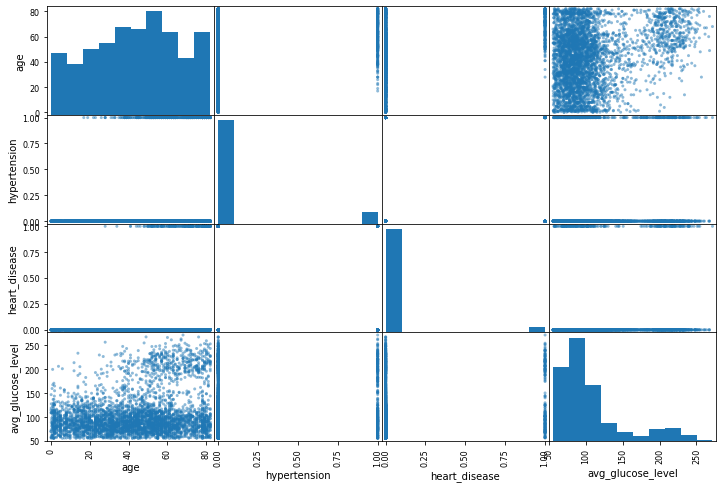

In [99]:
from pandas.plotting import scatter_matrix

attributes = ["age", "hypertension", "heart_disease",
              "avg_glucose_level"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

#Prepare the Data for Machine Learning Algorithms


In [101]:
dataset = strat_train_set.drop("stroke", axis=1) # drop labels for training set
dataset_labels = strat_train_set["stroke"].copy()

#Data Cleaning

In [102]:
incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
incomplete_rows
#Bmi da problemas, nos lo volamos

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3215,21534,Male,67.0,0,0,Yes,Private,Urban,260.85,NaN,Unknown
4684,49894,Female,78.0,1,1,Yes,Private,Rural,206.53,NaN,never smoked
4750,16902,Female,70.0,0,1,Yes,Self-employed,Urban,240.69,NaN,smokes
3007,3135,Female,73.0,0,0,No,Self-employed,Rural,69.35,NaN,never smoked
81,26015,Female,66.0,0,0,Yes,Self-employed,Urban,101.45,NaN,Unknown


In [103]:
incomplete_rows.dropna(subset=["bmi"])    # option 1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status


In [104]:
incomplete_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3215,21534,Male,67.0,0,0,Yes,Private,Urban,260.85,NaN,Unknown
4684,49894,Female,78.0,1,1,Yes,Private,Rural,206.53,NaN,never smoked
4750,16902,Female,70.0,0,1,Yes,Self-employed,Urban,240.69,NaN,smokes
3007,3135,Female,73.0,0,0,No,Self-employed,Rural,69.35,NaN,never smoked
81,26015,Female,66.0,0,0,Yes,Self-employed,Urban,101.45,NaN,Unknown


In [105]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [113]:
#Estos son las features no numericas, despues se trabajaran en ellas
dataset_num = dataset.drop("    ever_married  ", axis=1)
dataset_num = dataset_num.drop("work_type     ", axis=1)
dataset_num = dataset_num.drop("Residence_type", axis=1)
dataset_num = dataset_num.drop("smoking_status", axis=1)
dataset_num = dataset_num.drop("gender        ", axis=1)
dataset_num


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
82,26727,79.0,0,0,88.92,22.9
1905,7344,38.0,0,0,237.74,21.2
1392,34436,2.0,0,0,109.56,16.4
2913,23890,44.0,1,0,105.77,36.8
3822,41153,32.0,0,0,100.01,37.2
...,...,...,...,...,...,...
4507,48721,26.0,0,0,190.67,20.2
630,39745,60.0,0,0,58.65,30.1
2606,70081,42.0,1,0,77.24,41.2
3127,53482,32.0,0,0,56.08,35.9


In [114]:
imputer.fit(dataset_num)

SimpleImputer(strategy='median')

In [115]:
imputer.statistics_

array([3.6932e+04, 4.5000e+01, 0.0000e+00, 0.0000e+00, 9.1850e+01,
       2.8000e+01])

In [116]:
dataset_num.median().values

array([3.6932e+04, 4.5000e+01, 0.0000e+00, 0.0000e+00, 9.1850e+01,
       2.8000e+01])

In [118]:
#Transform the training set:
X = imputer.transform(dataset_num)

In [121]:
dataset_tr = pd.DataFrame(X, columns=dataset_num.columns,
                          index=dataset.index)

In [123]:
dataset_tr.loc[incomplete_rows.index.values]

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
3215,21534.0,67.0,0.0,0.0,260.85,28.0
4684,49894.0,78.0,1.0,1.0,206.53,28.0
4750,16902.0,70.0,0.0,1.0,240.69,28.0
3007,3135.0,73.0,0.0,0.0,69.35,28.0
81,26015.0,66.0,0.0,0.0,101.45,28.0


In [124]:
imputer.strategy

'median'

In [125]:
dataset_tr = pd.DataFrame(X, columns=dataset_num.columns,
                          index=dataset_num.index)

In [126]:
dataset_tr.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
82,26727.0,79.0,0.0,0.0,88.92,22.9
1905,7344.0,38.0,0.0,0.0,237.74,21.2
1392,34436.0,2.0,0.0,0.0,109.56,16.4
2913,23890.0,44.0,1.0,0.0,105.77,36.8
3822,41153.0,32.0,0.0,0.0,100.01,37.2


#Handling Text and Categorical Attributes


Now let's preprocess the categorical input feature, ever_married,work_type,Residence_type,smoking_status,gender:

In [127]:
dataset_cat = dataset[["ever_married","work_type","Residence_type","smoking_status","gender"]]
dataset_cat.head(10)

,ever_married,work_type,Residence_type,smoking_status,gender
82,No,Private,Rural,never smoked,Female
1905,Yes,Govt_job,Rural,never smoked,Male
1392,No,children,Rural,Unknown,Female
2913,Yes,Govt_job,Rural,never smoked,Female
3822,Yes,Private,Urban,never smoked,Female
3840,No,Private,Urban,formerly smoked,Female
2613,No,Private,Rural,never smoked,Male
1850,Yes,Self-employed,Rural,never smoked,Female
2642,Yes,Private,Rural,never smoked,Female
4688,No,Self-employed,Rural,Unknown,Male


In [128]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
dataset_cat_encoded = ordinal_encoder.fit_transform(dataset_cat)
dataset_cat_encoded[:10]

array([[0., 2., 0., 2., 0.],
       [1., 0., 0., 2., 1.],
       [0., 4., 0., 0., 0.],
       [1., 0., 0., 2., 0.],
       [1., 2., 1., 2., 0.],
       [0., 2., 1., 1., 0.],
       [0., 2., 0., 2., 1.],
       [1., 3., 0., 2., 0.],
       [1., 2., 0., 2., 0.],
       [0., 3., 0., 0., 1.]])

In [129]:
ordinal_encoder.categories_

[array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [130]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
dataset_cat_1hot = cat_encoder.fit_transform(dataset_cat)
dataset_cat_1hot

#By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:


<4088x15 sparse matrix of type '<class 'numpy.float64'>'
	with 20440 stored elements in Compressed Sparse Row format>

In [131]:
dataset_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.]])

#Custom Transformers

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)